## 例5-3

In [1]:
data_1 = pd.read_excel('data.xlsx', sheetname='5_3')
data_1.head()

,100固定资产原值实现值（%）,100元固定资产原值实现利税（%）,100元资金实现利税（%）,100元工业总产值实现利税（%）,100元销售收入实现利税（%）,每吨标准煤实现工业产值（元）,每千瓦时电力实现工业产值（元）,全员劳动生产率（元/人.年）,100元流动资金实现产值（元）
北京（1）,119.29,30.98,29.92,25.97,15.48,2178.00,3.41,21006.0,296.7
天津（2）,143.98,31.59,30.21,21.94,12.29,2852.00,4.29,20254.0,363.1
河北（3）,94.80,17.20,17.95,18.14,9.37,1167.00,2.03,12607.0,322.2
山西（4）,65.80,11.08,11.06,12.15,16.84,8.82,1.65,10166.0,284.7
内蒙（5）,54.79,9.24,9.54,16.86,6.27,894.00,1.80,7564.0,225.4


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_1 = scale(data_1)
pca_1 = PCA(n_components = X_1.shape[1])
pca_1.fit(X_1)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [3]:
np.cumsum(pca_1.explained_variance_ratio_)

array([ 0.68332051,  0.8469752 ,  0.92446628,  0.95978013,  0.98089611,
        0.99378998,  0.99702526,  0.99972796,  1.        ])

In [4]:
pca_1.n_components = 2
data_1_transform = pd.DataFrame(pca_1.fit_transform(X_1), index=data_1.index)
data_1_transform.head()

,0,1
北京（1）,2.867916,-2.470254
天津（2）,3.804385,-0.546328
河北（3）,-0.495765,0.099541
山西（4）,-2.059101,-0.391627
内蒙（5）,-3.030913,0.745938


In [5]:
components_1 = pd.DataFrame(pca_1.components_, columns=data_1.columns)
components_1

,100固定资产原值实现值（%）,100元固定资产原值实现利税（%）,100元资金实现利税（%）,100元工业总产值实现利税（%）,100元销售收入实现利税（%）,每吨标准煤实现工业产值（元）,每千瓦时电力实现工业产值（元）,全员劳动生产率（元/人.年）,100元流动资金实现产值（元）
0,0.375559,0.393396,0.375256,0.093534,0.174559,0.372149,0.361616,0.351316,0.362594
1,0.259512,-0.134374,-0.265294,-0.711329,-0.491327,0.164956,0.225403,0.052364,0.126751


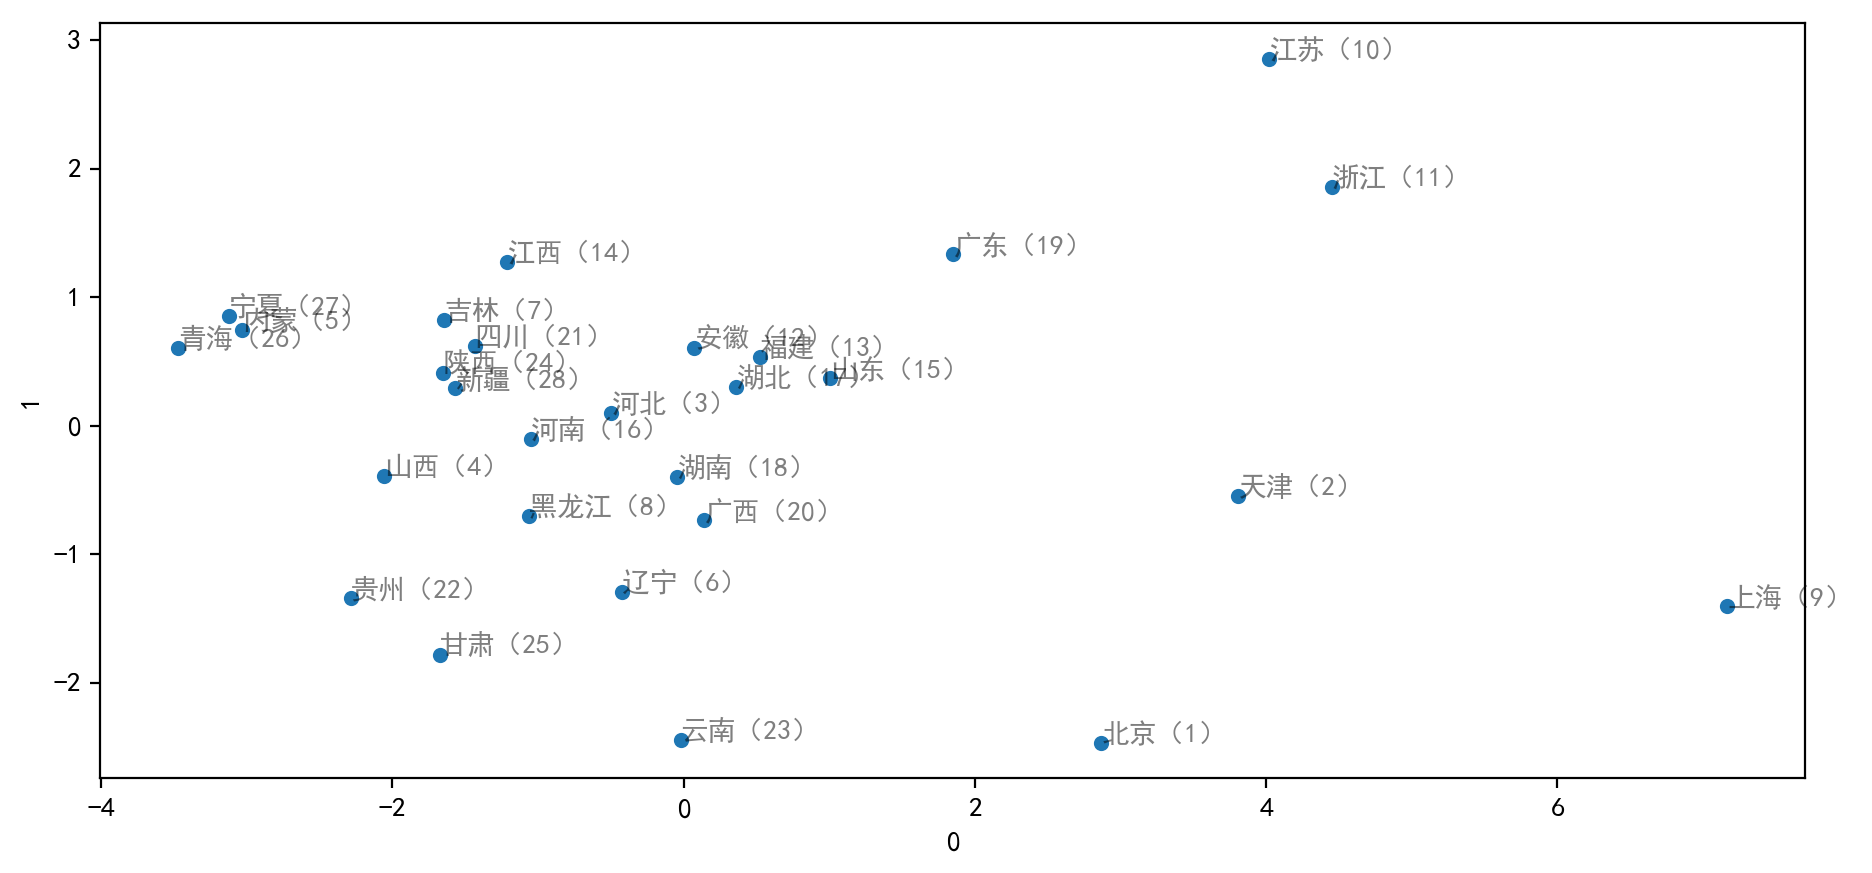

In [6]:
plt.figure(dpi=100, figsize=(11,5))
ax = plt.subplot(111)
data_1_transform.plot.scatter(0,1, ax=ax, alpha=1)

for i in range(data_1_transform.shape[0]):
    ax.annotate(data_1.index[i], (data_1_transform.iloc[i,0], data_1_transform.iloc[i,1]),alpha=0.5)
plt.show()

## 例5-4

In [7]:
data_2 = pd.read_excel('data.xlsx', sheetname='5_4', index_col=1)
data_2.drop(data_2.columns[0], axis=1, inplace=True)
data_2.head()

,固定资产利税率,资金利税率,销售收入利税率,资金利润率,固定资产产值率,流动资金周转天数,万元产值能耗,全员劳动生产率
琉璃河,16.68,26.75,31.84,18.40,53.25,55,28.83,1.75
邯郸,19.70,27.56,32.94,19.20,59.82,55,32.92,2.87
大同,15.20,23.40,32.98,16.24,46.78,65,41.69,1.53
哈尔滨,7.29,8.97,21.30,4.76,34.39,62,39.28,1.63
华新,29.45,56.49,40.74,43.68,75.32,69,26.68,2.14


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
X_2 = scale(data_2)
pca_2 = PCA(n_components = X_2.shape[1])
pca_2.fit(X_2)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
np.cumsum(pca_2.explained_variance_ratio_)

array([ 0.60659559,  0.76209028,  0.87086723,  0.93984266,  0.9844731 ,
        0.99722212,  0.99981104,  1.        ])

In [10]:
components_2 = pd.DataFrame(pca_2.components_, columns=data_2.columns).T
components_2

,0,1,2,3,4,5,6,7
固定资产利税率,0.433707,-0.062104,-0.257976,0.081308,0.128316,-0.039115,-0.845007,0.053360
资金利税率,0.408844,-0.341303,0.117503,-0.064951,-0.093006,0.500918,0.114293,-0.652458
销售收入利税率,0.389459,0.011613,-0.379701,-0.036006,0.567798,-0.431738,0.407098,-0.167917
资金利润率,0.421058,-0.317615,0.019089,0.016375,0.010354,0.333828,0.267640,0.733498
固定资产产值率,0.358586,0.065730,0.221987,-0.652015,-0.456810,-0.427770,0.001168,0.032105
流动资金周转天数,-0.183497,-0.724978,-0.318667,0.227267,-0.380217,-0.374062,0.035146,-0.042586
万元产值能耗,-0.294363,-0.035476,-0.635422,-0.623279,0.026544,0.342397,-0.023966,0.036604
全员劳动生产率,0.258596,0.497462,-0.469593,0.349794,-0.546295,0.097807,0.183655,-0.032439


In [11]:
pca_2.n_components = 3
data_2_transform = pd.DataFrame(pca_2.fit_transform(X_2), index=data_2.index)
data_2_transform

,0,1,2
琉璃河,0.024291,1.058371,1.505380
邯郸,0.893557,2.276377,-0.441902
大同,-1.687730,-0.258355,-0.847562
哈尔滨,-3.877832,0.994383,0.237406
华新,4.021490,-1.691862,0.320742
湘乡,3.985881,1.534519,-1.055120
柳州,1.714200,0.281474,-1.016076
峨嵋,-2.923548,-1.166396,-0.969734
耀县,-0.518318,-0.822705,-1.058250
永登,0.736383,-0.326908,-0.299760


In [12]:
f1 = np.dot(data_2_transform.iloc[:,0], pca_2.explained_variance_ratio_[0])
index = f1.argsort()
F1 = pd.DataFrame(data_2_transform[0])
F1['名次'] = index
F1

,0,名次
琉璃河,0.024291,3
邯郸,0.893557,7
大同,-1.687730,14
哈尔滨,-3.877832,2
华新,4.021490,12
湘乡,3.985881,11
柳州,1.714200,8
峨嵋,-2.923548,10
耀县,-0.518318,0
永登,0.736383,9
